# Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.stats import zscore
from sklearn.metrics import silhouette_score,classification_report
import pandas as pd

# Print many lines atsame time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_columns=1000

# Load dataset

In [5]:

    
df=pd.read_csv("Recruitment_Dataset.csv")



# EDA

In [6]:
df.head()
df.tail()
print('number of rows:',df.shape[0])
print('number of columns:',df.shape[1])
df.info()
df.describe().transpose()

,Candidate_Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


,Candidate_Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
8990,3822427,No,4,0,E1,191.67,191.67,0.00,No,No,Male,Employee Referral,1,ERS,Chennai,34,Joined
8991,3828206,Yes,2,0,E1,150.00,150.00,0.00,No,No,Female,Direct,3,BFSI,Chennai,34,Joined
8992,3834159,No,0,0,E2,35.42,35.42,0.00,No,No,Male,Direct,5,INFRA,Noida,34,Joined
8993,3835433,No,0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,Joined
8994,3836076,No,2,0,E1,45.25,14.09,-21.45,No,No,Female,Employee Referral,1,INFRA,Chennai,34,Joined


number of rows: 8995
number of columns: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Candidate_Ref                8995 non-null   int64  
 1   DOJ.Extended                 8995 non-null   object 
 2   Duration.to.accept.offer     8995 non-null   int64  
 3   Notice.period                8995 non-null   int64  
 4   Offered.band                 8995 non-null   object 
 5   Pecent.hike.expected.in.CTC  8995 non-null   float64
 6   Percent.hike.offered.in.CTC  8995 non-null   float64
 7   Percent.difference.CTC       8995 non-null   float64
 8   Joining.Bonus                8995 non-null   object 
 9   Candidate.relocate.actual    8995 non-null   object 
 10  Gender                       8995 non-null   object 
 11  Candidate.Source             8995 non-null   object 
 12  Rex.in.Yrs                   8995

,count,mean,std,min,25%,50%,75%,max
Candidate_Ref,8995.0,2.843647e+06,486344.774552,2109586.00,2386476.00,2807482.0,3300059.50,3836076.00
Duration.to.accept.offer,8995.0,2.143446e+01,25.811616,0.00,3.00,10.0,33.00,224.00
Notice.period,8995.0,3.929183e+01,22.220239,0.00,30.00,30.0,60.00,120.00
Pecent.hike.expected.in.CTC,8995.0,4.386480e+01,29.788975,-68.83,27.27,40.0,53.85,359.77
Percent.hike.offered.in.CTC,8995.0,4.065736e+01,36.064060,-60.53,22.09,36.0,50.00,471.43
Percent.difference.CTC,8995.0,-1.573802e+00,19.610729,-67.27,-8.33,0.0,0.00,300.00
Rex.in.Yrs,8995.0,4.239022e+00,2.547571,0.00,3.00,4.0,6.00,24.00
Age,8995.0,2.991317e+01,4.097912,20.00,27.00,29.0,34.00,60.00


In [7]:
# categorical variables
df.select_dtypes(include='object').columns

Index(['DOJ.Extended', 'Offered.band', 'Joining.Bonus',
       'Candidate.relocate.actual', 'Gender', 'Candidate.Source', 'LOB',
       'Location', 'Status'],
      dtype='object')

In [8]:
# percentage of department category
a=df['Status'].value_counts()
per=(a.values/df.shape[0])*100
p1=pd.DataFrame()
p1['Status']=df['Status'].unique()
p1['Percentage']=per
p1

,Status,Percentage
0,Joined,81.300723
1,Not Joined,18.699277


In [9]:
# percentage of department category
a=df['Offered.band'].value_counts()
per=(a.values/df.shape[0])*100
p1=pd.DataFrame()
p1['Offered.band']=df['Offered.band'].unique()
p1['Percentage']=per
p1

,Offered.band,Percentage
0,E2,61.901056
1,E1,30.138966
2,E3,5.614230
3,E0,2.345748


In [10]:
# percentage 
a=df['Gender'].value_counts()
per=(a.values/df.shape[0])*100
p1=pd.DataFrame()
p1['Gender']=df['Gender'].unique()
p1['Percentage']=per
p1


,Gender,Percentage
0,Female,82.757087
1,Male,17.242913


In [11]:

# percentage 
a=df['Candidate.Source'].value_counts()
per=(a.values/df.shape[0])*100
p1=pd.DataFrame()
p1['Candidate.Source']=df['Candidate.Source'].unique()
p1['Percentage']=per
p1

,Candidate.Source,Percentage
0,Agency,53.374097
1,Employee Referral,28.738188
2,Direct,17.887715


In [12]:

# percentage 
a=df['DOJ.Extended'].value_counts()
per=(a.values/df.shape[0])*100
p1=pd.DataFrame()
p1['DOJ.Extended']=df['DOJ.Extended'].unique()
p1['Percentage']=per
p1

,DOJ.Extended,Percentage
0,Yes,53.229572
1,No,46.770428


In [13]:

# percentage 
a=df['Joining.Bonus'].value_counts()
per=(a.values/df.shape[0])*100
p1=pd.DataFrame()
p1['Joining.Bonus']=df['Joining.Bonus'].unique()
p1['Percentage']=per
p1

,Joining.Bonus,Percentage
0,No,95.364091
1,Yes,4.635909


In [20]:
df.columns

Index(['Candidate_Ref', 'DOJ.Extended', 'Duration.to.accept.offer',
       'Notice.period', 'Offered.band', 'Pecent.hike.expected.in.CTC',
       'Percent.hike.offered.in.CTC', 'Percent.difference.CTC',
       'Joining.Bonus', 'Candidate.relocate.actual', 'Gender',
       'Candidate.Source', 'Rex.in.Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

In [24]:
rankings_pd = pd.DataFrame(df)
rankings_pd.rename(columns = {'DOJ.Extended':'DOJ_Extended', 'Duration.to.accept.offer':'Duration_to_accept_offer',
                              'Notice.period':'Notice_period','Offered.band':'Offered_band',
                        'Pecent.hike.expected.in.CTC':'Pecent_hike_expected_in_CTC',
                        'Percent.difference.CTC':'Percent_difference_CTC','Joining.Bonus':'Joining_Bonus',
                       'Candidate.relocate.actual':'Candidate_relocate_actual','Candidate.Source':'Candidate_Source',
                       'Rex.in.Yrs':'Rex_in_Yrs'}, inplace = True)

In [25]:
df.columns

Index(['Candidate_Ref', 'DOJ_Extended', 'Duration_to_accept_offer',
       'Notice_period', 'Offered_band', 'Pecent_hike_expected_in_CTC',
       'Percent.hike.offered.in.CTC', 'Percent_difference_CTC',
       'Joining_Bonus', 'Candidate_relocate_actual', 'Gender',
       'Candidate_Source', 'Rex_in_Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

<AxesSubplot:xlabel='Location'>

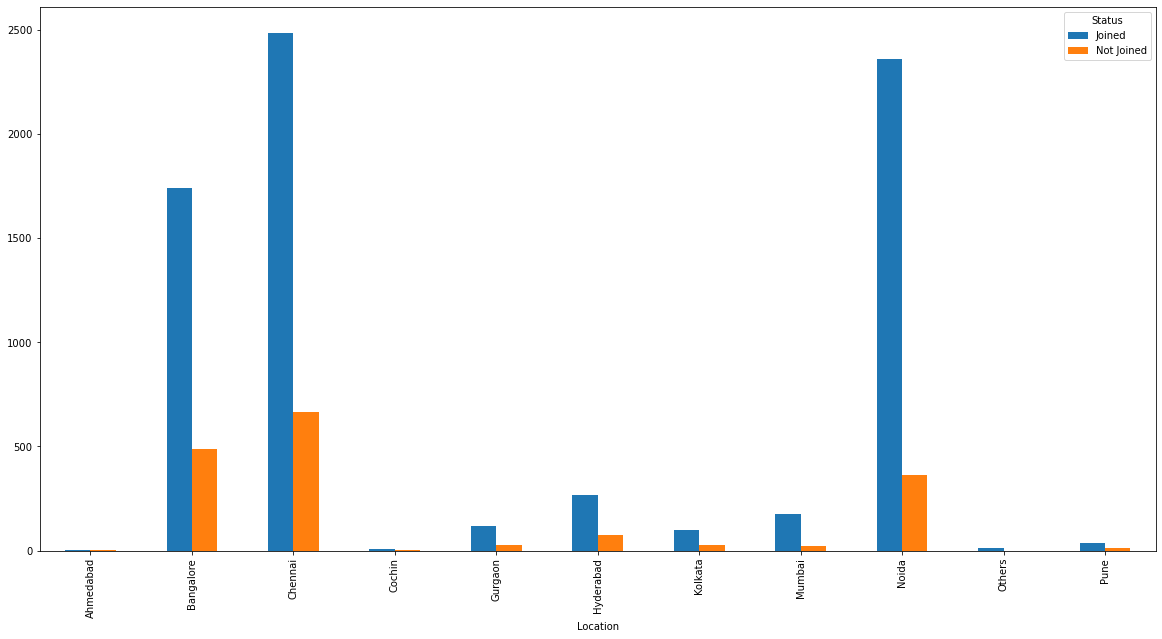

In [44]:
pd.crosstab(df.Location,df.Status).plot(kind='bar',figsize=(20, 10))

<AxesSubplot:xlabel='DOJ_Extended'>

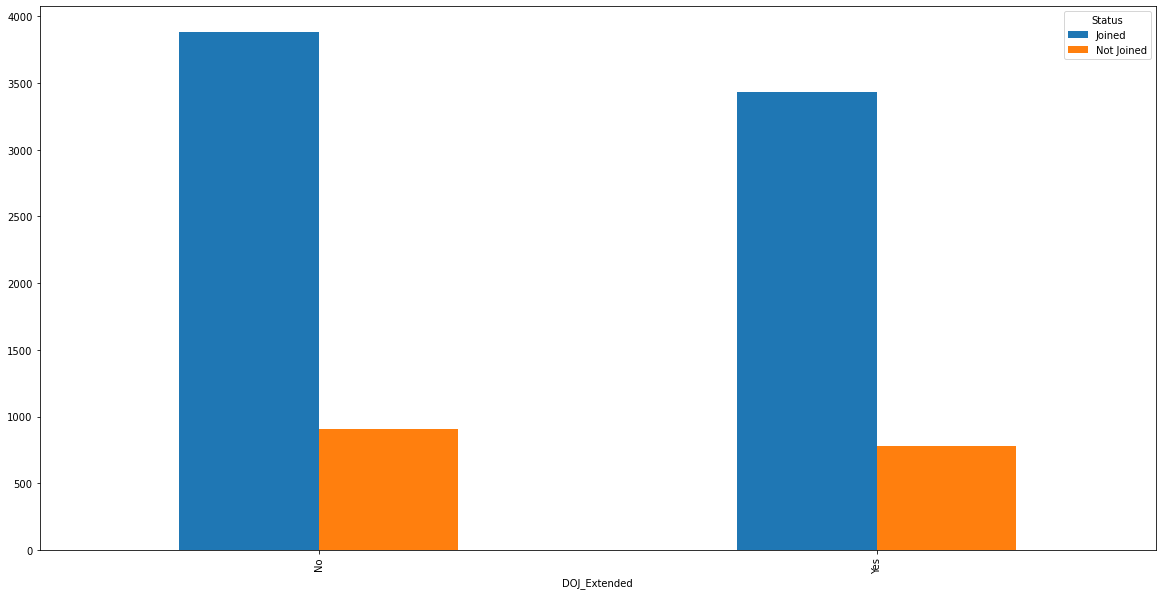

In [43]:
pd.crosstab(df.DOJ_Extended,df.Status).plot(kind='bar',figsize=(20, 10))

<AxesSubplot:xlabel='Candidate_relocate_actual'>

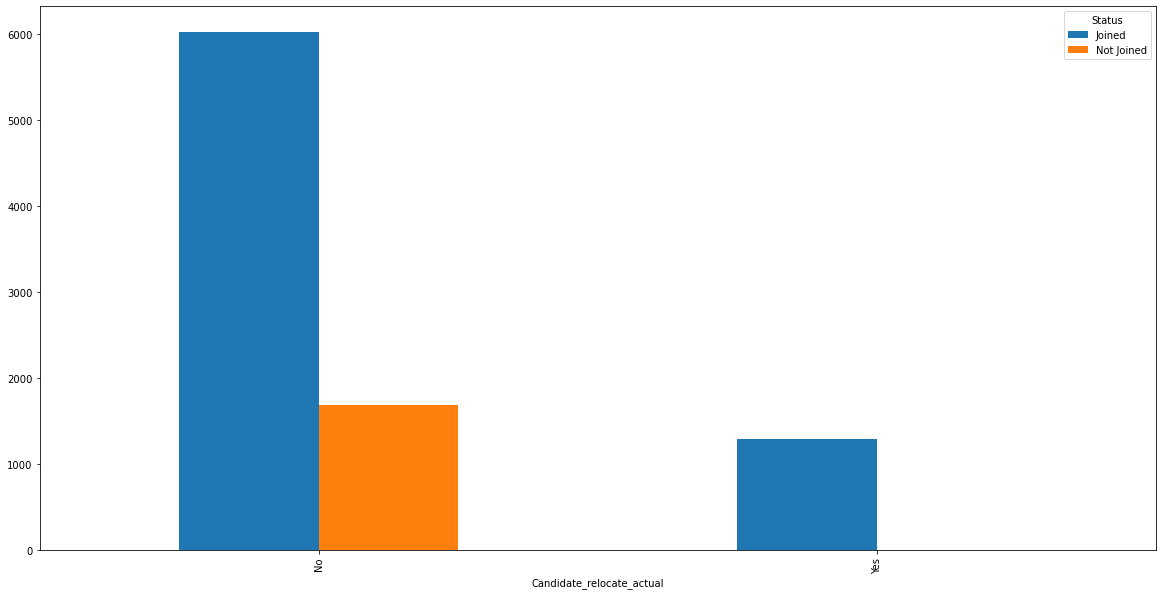

In [42]:
pd.crosstab(df.Candidate_relocate_actual,df.Status).plot(kind='bar',figsize=(20, 10))

<AxesSubplot:xlabel='Gender'>

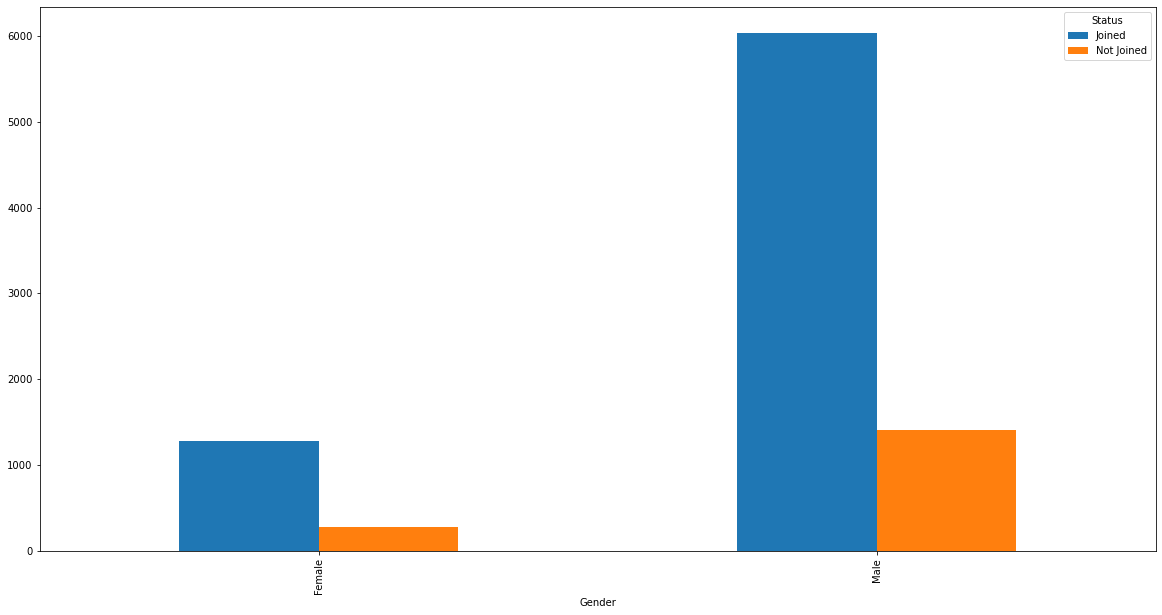

In [39]:
#pd.crosstab(df.Gender,df.Status).plot(kind='bar')
pd.crosstab(df.Gender,df.Status).plot(kind='bar',figsize=(20, 10))

<AxesSubplot:xlabel='Notice_period'>

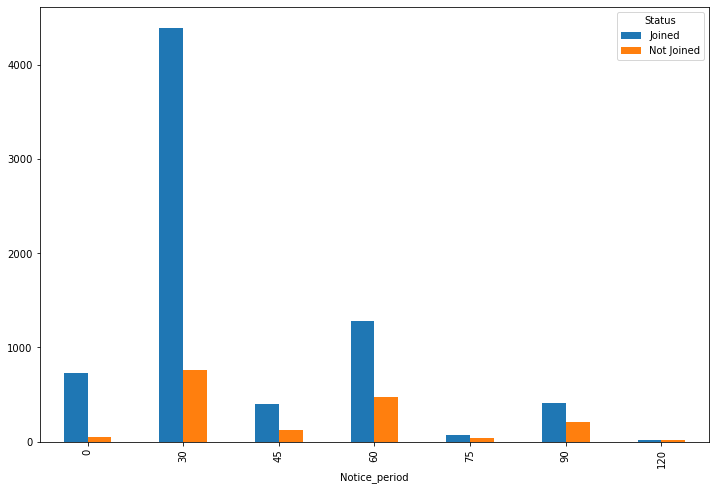

In [36]:
pd.crosstab(df.Notice_period,df.Status).plot(kind='bar',figsize=(12, 8))

<AxesSubplot:xlabel='Notice_period'>

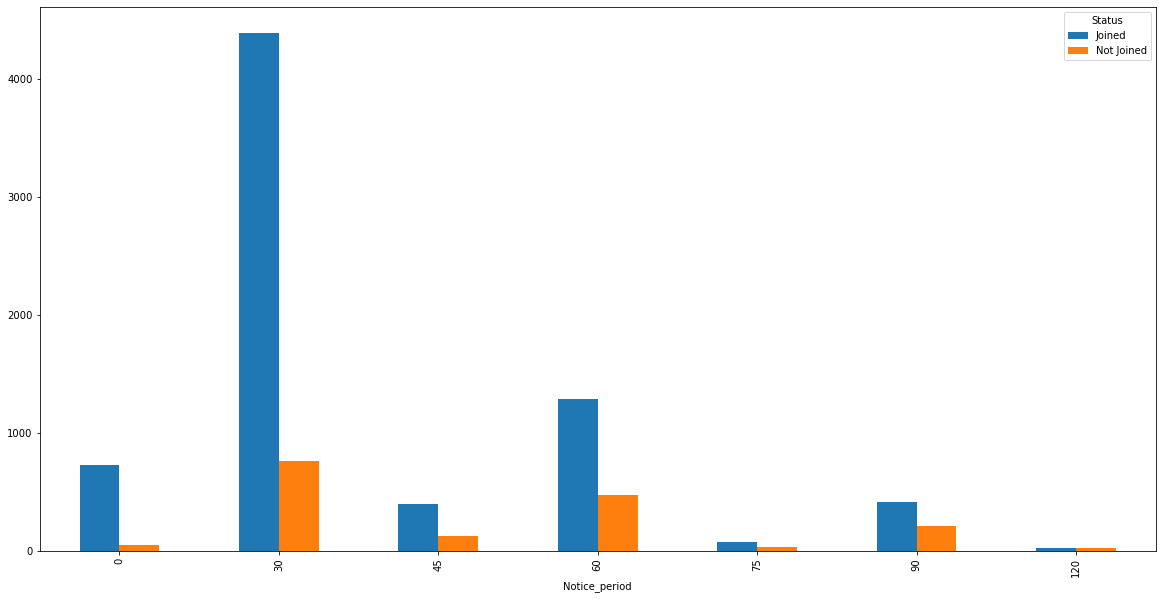

In [38]:
pd.crosstab(df.Notice_period,df.Status).plot(kind='bar',figsize=(20, 10))

In [ ]:
# compute percentage of each format
percentage = []
for i in range(data.shape[0]):
	pct = (data.Runs[i] / total_runs) * 100
	percentage.append(round(pct,2))
data['Percentage'] = percentage

# depict illustration
plt.figure(figsize=(8,8))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(data.Format,data.Runs, color = colors_list)
plt.title('Percentage of runs scored by MS Dhoni across all formats')

i = 0
for p in graph:
	width = p.get_width()
	height = p.get_height()
	x, y = p.get_xy()
	plt.text(x+width/2,
			y+height*1.01,
			str(data.Percentage[i])+'%',
			ha='center',
			weight='bold')
	i+=1
plt.show()



In [26]:
#Correlation
df.corr()

,Candidate_Ref,Duration_to_accept_offer,Notice_period,Pecent_hike_expected_in_CTC,Percent.hike.offered.in.CTC,Percent_difference_CTC,Rex_in_Yrs,Age
Candidate_Ref,1.000000,-0.030752,-0.120810,0.077124,0.044828,-0.016667,-0.047440,0.306520
Duration_to_accept_offer,-0.030752,1.000000,0.363760,0.018821,0.007307,-0.009395,0.113951,0.020131
Notice_period,-0.120810,0.363760,1.000000,-0.005262,-0.013458,-0.015067,0.181786,-0.004967
Pecent_hike_expected_in_CTC,0.077124,0.018821,-0.005262,1.000000,0.668594,-0.161501,-0.217391,-0.137705
Percent.hike.offered.in.CTC,0.044828,0.007307,-0.013458,0.668594,1.000000,0.598779,-0.110243,-0.080010
Percent_difference_CTC,-0.016667,-0.009395,-0.015067,-0.161501,0.598779,1.000000,0.081547,0.037955
Rex_in_Yrs,-0.047440,0.113951,0.181786,-0.217391,-0.110243,0.081547,1.000000,0.568228
Age,0.306520,0.020131,-0.004967,-0.137705,-0.080010,0.037955,0.568228,1.000000


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

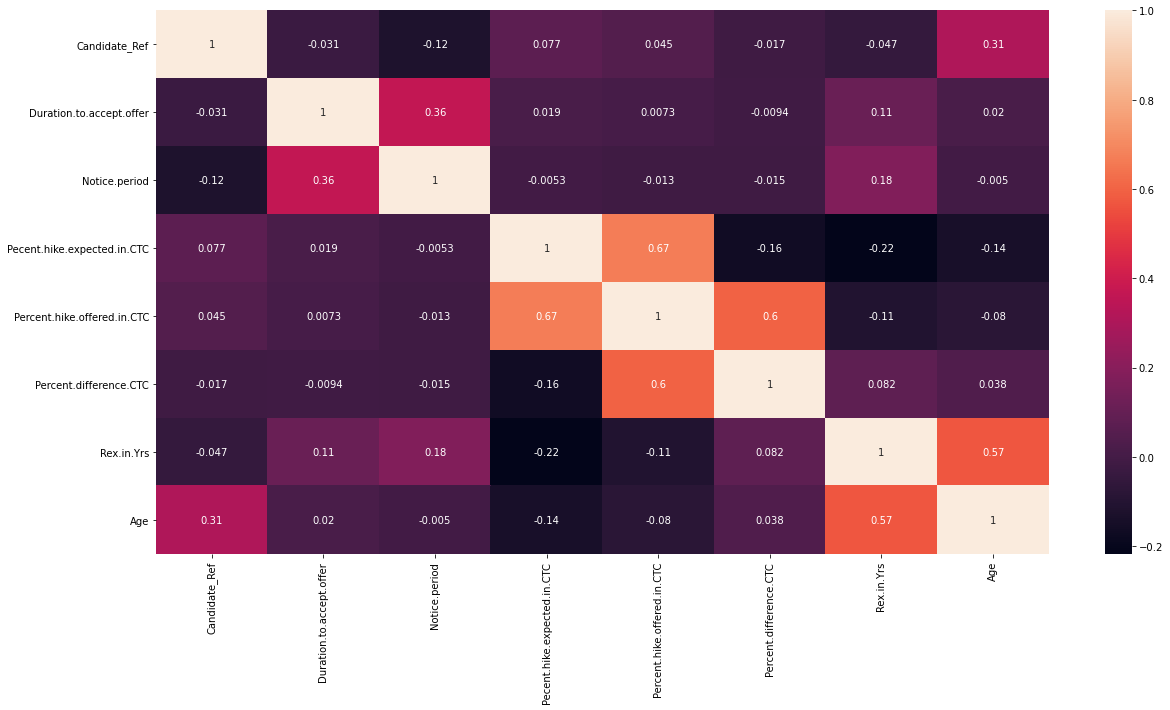

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr() , annot=True)
plt.show()

# Segmented Univariate Analysis

In [46]:
#df.groupby('Gender')['Status'].mean().sort_values(ascending=False)